Input range: From -18.84955592153876 to 18.84955592153876




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Generated 1000000 cartesian products in total
     Series1   Series2  Series3  Label
0 -18.849556 -3.141593    0.001    0.0
1 -18.080186 -3.141593    0.001    0.0
2 -17.310817 -3.141593    0.001    0.0
3 -16.541447 -3.141593    0.001    0.0
4 -15.772077 -3.141593    0.001    0.0


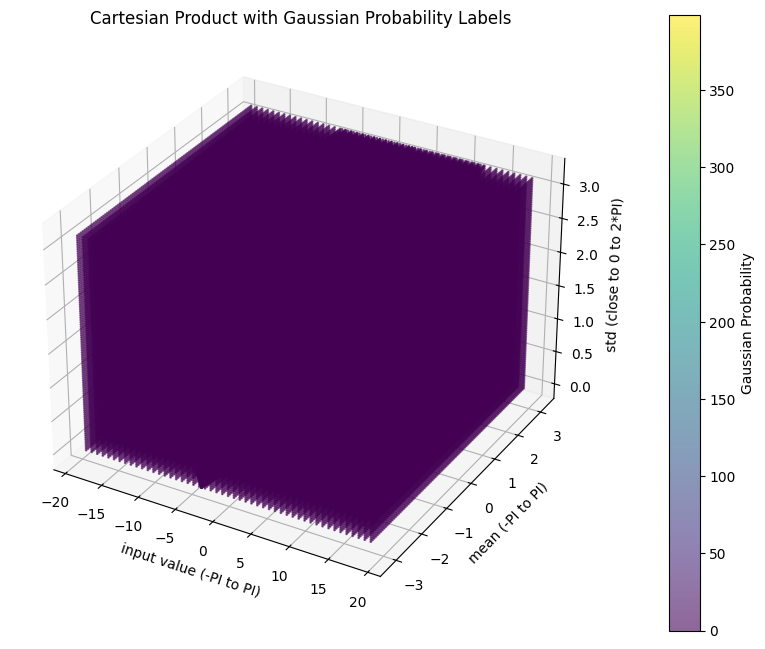

In [2]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100

# STD Series: From a very small number close to 0 to 2*PI, to insure wide representation of std values. Low ones having a "sharper" curve, higher ones having a "flatter" curve.
# Potentially want to distribute it more over the higher numebrs, since lower numbers are less likely to be used in practice.
small_number = 0.001
std = np.linspace(small_number, np.pi, num_values)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(-np.pi, np.pi, num_values)

# We add a minimum input value and maximum input value based on the smallest and highest mean and the maximum std values
min_input = mean.min() - 5 * std.max()
max_input = mean.max() + 5 * std.max()

print(f"Input range: From {min_input} to {max_input}")

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Linearly spaced values from min_input to max_input for 50% of the values
    samples = np.linspace(min_input, max_input, int(num_values * 0.5))
    
    # Add samples with a normal distribution around the mean for the remaining 50% of the values
    normal_samples = [m]
    extra_lin_samples = np.linspace(m - 3 * s, m + 3 * s, int(num_values * 0.49))
    samples = np.concatenate((samples, normal_samples, extra_lin_samples))
    
    inputval.extend(samples)
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [3]:
cartesian_df.describe()

,Series1,Series2,Series3,Label
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
mean,-4.260983e-16,6.139089e-18,1.571296,9.864535e-01
std,8.269072e+00,1.832030e+00,0.915723,1.552405e+01
min,-1.884956e+01,-3.141593e+00,0.001000,0.000000e+00
25%,-4.231533e+00,-1.570796e+00,0.786148,1.300416e-09
50%,0.000000e+00,2.220446e-16,1.571296,1.429031e-02
75%,4.231533e+00,1.570796e+00,2.356444,1.250794e-01
max,1.884956e+01,3.141593e+00,3.141593,3.989423e+02


In [4]:
labels.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [5]:
labels.describe()

count    1.000000e+06
mean     9.864535e-01
std      1.552405e+01
min      0.000000e+00
25%      1.300416e-09
50%      1.429031e-02
75%      1.250794e-01
max      3.989423e+02
Name: Label, dtype: float64

In [6]:
import numpy as np

# Example labels (replace with your actual labels)
labels = cartesian_df['Label']

labels.quantile(0.999)

np.float64(328.1848729125327)

(array([9.90366e+05, 3.42600e+03, 1.40600e+03, 6.02000e+02, 2.00000e+02,
        2.00000e+02, 0.00000e+00, 2.00000e+02, 0.00000e+00, 0.00000e+00,
        2.00000e+02, 0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00

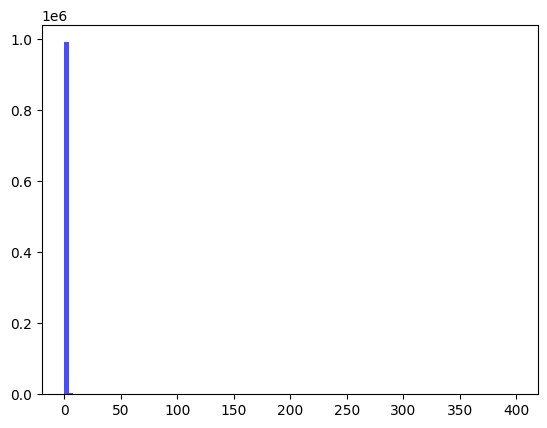

In [7]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
#cartesian_df['Label'] = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

cartesian_df['Label'].describe()
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [8]:
cartesian_df['Label'].quantile(0.9)

np.float64(0.2899925384226876)

In [9]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 6892


In [10]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import pickle

# Additionally save a normalized version of the dataset
# With feature AND label normalization

# Standardize the features and labels
cartesian_df_unchanged = cartesian_df.copy()
print(cartesian_df_unchanged.describe())

# Log1p transform the labels
cartesian_df_unchanged['Label'] = np.log1p(cartesian_df_unchanged['Label'])

# Split the standardized dataset and save with scalers
train_df, test_df = train_test_split(cartesian_df_unchanged, test_size=0.2, train_size=0.8, random_state=42)

# Save the datasets to files
train_file = "./extraextra_lin_unchangedinp_log1p_larger_range_train_data.csv"
test_file = "./extraextra_lin_unchangedinp_log1p_larger_range_test_data.csv"

# Save files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


            Series1       Series2         Series3         Label
count  1.000000e+06  1.000000e+06  1000000.000000  1.000000e+06
mean  -4.260983e-16  6.139089e-18        1.571296  9.864535e-01
std    8.269072e+00  1.832030e+00        0.915723  1.552405e+01
min   -1.884956e+01 -3.141593e+00        0.001000  0.000000e+00
25%   -4.231533e+00 -1.570796e+00        0.786148  1.300416e-09
50%    0.000000e+00  2.220446e-16        1.571296  1.429031e-02
75%    4.231533e+00  1.570796e+00        2.356444  1.250794e-01
max    1.884956e+01  3.141593e+00        3.141593  3.989423e+02


In [11]:
# Print for all mean and std combinations the reference curve and the input points
import matplotlib.pyplot as plt

# Group by mean and std

#grouped = cartesian_df.groupby(['Series2', 'Series3'])

# Plot the reference curve and input points for each group

# for name, group in grouped:
#     mean, std = name
#     x = np.linspace(min_input, max_input, 1000)
#     y = gaussian_probability(x, mean, std)
#     plt.plot(x, y, label='Reference Curve')
#     plt.scatter(group['Series1'], group['Label'], label='Input Points', color='red', s=5)
#     plt.title(f'Mean: {mean}, Std: {std}')
#     plt.xlabel('Input Value')
#     plt.ylabel('Label')
#     plt.legend()
#     plt.show()
#     print(len(group['Series1']))


In [12]:
train_df["Label"].describe()

count    8.000000e+05
mean     1.203007e-01
std      3.929215e-01
min      0.000000e+00
25%      1.329654e-09
50%      1.420751e-02
75%      1.176513e-01
max      5.991320e+00
Name: Label, dtype: float64

In [13]:
test_df["Label"].describe()

count    2.000000e+05
mean     1.211952e-01
std      3.935192e-01
min      0.000000e+00
25%      1.167163e-09
50%      1.410584e-02
75%      1.186707e-01
max      5.991320e+00
Name: Label, dtype: float64

In [14]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)
print(outlieres_removed_series.describe())
outlieres_removed_series.quantile(0.50)

Identified outliers: 10127
Non-outlier observations: 789873
count    7.898730e+05
mean     8.507422e-02
std      1.605809e-01
min      0.000000e+00
25%      7.986675e-10
50%      1.324654e-02
75%      1.131564e-01
max      1.292810e+00
dtype: float64


np.float64(0.013246537039454234)

In [15]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 20111
Non-outlier observations: 769762


In [16]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    7.697620e+05
mean     6.566191e-02
std      1.029921e-01
min      0.000000e+00
25%      2.707738e-10
50%      1.111712e-02
75%      1.030191e-01
max      5.664753e-01
dtype: float64

(array([3.47417e+05, 3.86140e+04, 2.51180e+04, 2.02030e+04, 1.68920e+04,
        1.39610e+04, 1.27470e+04, 1.18080e+04, 1.05900e+04, 9.97200e+03,
        9.49000e+03, 9.49700e+03, 8.16200e+03, 8.77800e+03, 8.04500e+03,
        8.37600e+03, 8.48500e+03, 7.49800e+03, 8.77900e+03, 8.20000e+03,
        9.63300e+03, 1.08750e+04, 9.42900e+03, 9.07900e+03, 8.08800e+03,
        7.07500e+03, 6.70000e+03, 6.32000e+03, 5.25900e+03, 5.20100e+03,
        5.56500e+03, 4.83900e+03, 4.15800e+03, 3.85800e+03, 3.66900e+03,
        3.81300e+03, 3.06600e+03, 3.22200e+03, 3.15800e+03, 2.33800e+03,
        2.93300e+03, 2.12600e+03, 2.55600e+03, 2.42000e+03, 2.35500e+03,
        1.86100e+03, 2.14700e+03, 1.49000e+03, 1.96500e+03, 1.46700e+03,
        1.75500e+03, 1.64100e+03, 1.59200e+03, 1.27600e+03, 1.09300e+03,
        1.88600e+03, 1.27800e+03, 8.94000e+02, 1.42800e+03, 7.66000e+02,
        1.41900e+03, 1.23300e+03, 7.34000e+02, 1.36500e+03, 8.84000e+02,
        1.53600e+03, 2.23000e+02, 8.81000e+02, 8.79

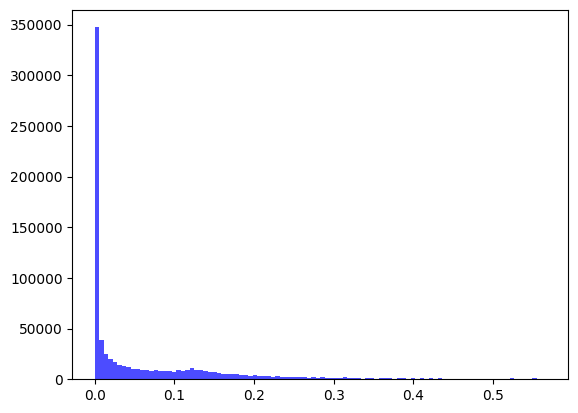

In [17]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')